# Importing the libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importing the dataset

In [2]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
# Here as we can see the first 4 colums represent the independent variables
# Whereas the last column i.e. 'Profit' represent the variable that we are trying to predict
print(dataset.keys())

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


# Preprocessing

In [4]:
# Making sure that the array is of correct dimension, so as to make sure no errors occur
y = y.reshape((len(y)), 1)

In [5]:
# Taking care of categorical feature i.e. State feature from the dataset
dummy = np.array(pd.get_dummies(X[:, 3], dtype=np.float32).values)
X = np.delete(X, 3, axis=1)
X = np.concatenate((X, dummy), axis=1)

In [6]:
# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

X[:, 0:3] = sc_X.fit_transform(X[:, 0:3])
y = sc_y.fit_transform(y)

# Splitting the dataset into training and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Making sure that all the arrays of proper datatype 
X_train=np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test=np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

# Building the model

In [8]:
# Input shape is 6 corresponding to 6 input features i.e Administration, Marketing spend, R&D and 3 for state variable 
model = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, input_shape=[6])])

# summary of the model

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


# Compiling the model

In [10]:
model.compile(optimizer=tf.compat.v1.train.GradientDescentOptimizer(0.01), loss='mean_squared_error')

# Training the model

In [11]:
history = model.fit(x=X_train, y=y_train, epochs=400, verbose=0)

# Cost v/s No. of iterations

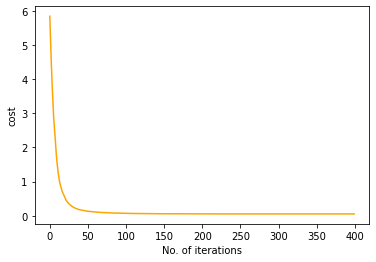

In [12]:
iter = [i for i in range(400)]

plt.plot(iter, history.history['loss'], color='orange')
plt.xlabel('No. of iterations')
plt.ylabel('cost')
plt.show()

#Prediction on the test set

In [13]:
model.evaluate(x=X_test, y=y_test)

1/1 [==============================] - 0s 92ms/step - loss: 0.0559


0.05591635778546333

In [16]:
y_pred = model.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
y_orig = sc_y.inverse_transform(y_test)
print(np.concatenate((y_pred, y_orig), axis=1))


# As we can see the predictions are pretty close to the test values but not exactly same,
# this is due to the fact that the amount of training data is pretty less and maybe overfitting.
# As we can see from the cost v/s iterations plot above, the algorithm does work properly
# and the cost is reducing nicely overall.
# The perfomance can be increased by getting additional data and avoiding overfitting, 
# so as to help the model generalize better to the previously unseen data.

[[103108.46  103282.38 ]
 [132325.72  144259.4  ]
 [131937.56  146121.95 ]
 [ 71356.76   77798.83 ]
 [178098.02  191050.39 ]
 [116360.22  105008.31 ]
 [ 67318.9    81229.06 ]
 [ 98756.99   97483.56 ]
 [113818.125 110352.25 ]
 [167348.06  166187.94 ]]
